# **Importing and Extracting the dataset**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
import seaborn as sns
from pathlib import Path

In [27]:
train_path = r"data\train"
test_path = r"testing\test"

In [28]:
training_data = tf.keras.utils.image_dataset_from_directory(train_path,validation_split=0.1,interpolation='area',image_size=(128,128),batch_size=16,subset='training',seed=42,color_mode='rgb')
validationData = tf.keras.utils.image_dataset_from_directory(train_path,validation_split=0.1,interpolation='area',image_size=(128,128),batch_size=16,subset='validation',seed=42,color_mode='rgb')

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.


In [29]:
testing_data = tf.keras.utils.image_dataset_from_directory(test_path,interpolation='area',image_size=(128,128),shuffle=False,batch_size=16)


Found 2000 files belonging to 2 classes.


In [30]:
#Creating list for y_test

test_labels = []
for i in range(0,5):
    for j in range(0,400):
        test_labels.append(i)
y_test = np.array(test_labels,dtype='int8')

# **Load Models**

In [31]:
irv2 = tf.keras.models.load_model('models/IRv2.h5')

OSError: No file or directory found at models/IRv2.h5

In [ ]:
vgg = tf.keras.models.load_model('models/VGG19.h5')

In [ ]:
xception = tf.keras.models.load_model('models/Xception.h5')

In [ ]:
densenet = tf.keras.models.load_model('models/Densenet.h5')

In [ ]:
resnet = tf.keras.models.load_model('models/Resnet.h5')

# **Predictions of Individual Models**

In [ ]:
def model_prediction(model):
    return model.predict(testing_data)

In [ ]:
preds1 = model_prediction(irv2)
preds2 = model_prediction(xception)
preds3 = model_prediction(densenet)
preds4 = model_prediction(vgg)
preds5 = model_prediction(resnet)



125/125 [==============================] - 80s 640ms/step


# **Ensemble Model Stats**

In [ ]:
def calculate_metrics(actual, predicted, class_labels):

    tn = np.zeros(len(class_labels))
    fp = np.zeros(len(class_labels))
    tp = np.zeros(len(class_labels))
    fn = np.zeros(len(class_labels))
    specificity = np.zeros(len(class_labels))

    for i, c in enumerate(class_labels):
        actual_c = actual == c
        predicted_c = predicted == c
        tn[i] = np.sum(np.logical_and(actual_c == False, predicted_c == False))
        fp[i] = np.sum(np.logical_and(actual_c == False, predicted_c == True))
        tp[i] = np.sum(np.logical_and(actual_c == True, predicted_c == True))
        fn[i] = np.sum(np.logical_and(actual_c == True, predicted_c == False))
        specificity[i] = tn[i] / (tn[i] + fp[i])

    return tn, fp, tp, fn, specificity

In [ ]:
ensemble_preds = np.argmax(preds1 + preds2 + preds3 + preds4 + preds5, axis=1)

In [ ]:
accuracy = np.mean(ensemble_preds == test_labels)
print(f'Ensemble accuracy: {accuracy:.3f}')

Ensemble accuracy: 0.681


In [ ]:
cr_ensemble = classification_report(y_true=y_test,y_pred=ensemble_preds,labels=[0,1,2,3,4])
print(cr_ensemble)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       400
           1       0.64      0.69      0.67       400
           2       0.63      0.52      0.57       400
           3       0.59      0.72      0.65       400
           4       0.62      0.50      0.56       400

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000



In [ ]:
cm_ensemble = tf.math.confusion_matrix(y_test,ensemble_preds)
cm_ensemble

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[388,   9,   1,   0,   2],
       [ 21, 277,  40,  29,  33],
       [ 12,  71, 207,  66,  44],
       [  5,  27,  37, 289,  42],
       [  2,  47,  44, 106, 201]])>

In [ ]:
tn, fp, tp, fn, specificity = calculate_metrics(y_test, ensemble_preds, [0,1,2,3,4])
print('Ensemble Model Specificity\n\n',specificity)

<AxesSubplot: >

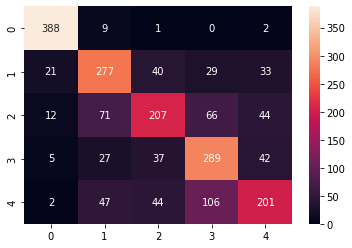

In [ ]:
sns.heatmap(cm_ensemble,fmt='d',annot=True)